In [ ]:
#WINE DATASET İLE KNN SINIFLANDIRMASI

#amaç knn kullanarak farklı özelliklere sahio şarapları 3 sınıfa ayırmak

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#VERİ SETİ YÜKLEME

wine=load_wine()#wine verisetinin yüklenmesi

X=wine.data#özellikler
y=wine.target #etiketler

print("Özellikler:",wine.feature_names)

Özellikler: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
#VERİYİ EĞİTİM VE TEST OLARAK AYIRMA

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#verinin %80 i eğitim %20 si test

In [ ]:
#KNN MODELİ KURULUMU ve EĞİTİMİ

knn=KNeighborsClassifier(n_neighbors=5)
#knn 5 olarcak şekilde kurulumu veri büyük ve özellik fazla

knn.fit(X_train,y_train)
#modelin fit fonksiyonu ile eğitimi


KNeighborsClassifier()

In [ ]:
#TAHMİN ve BAŞARI ÖLÇÜMÜ

y_pred=knn.predict(X_test)
#tahmin verilerinin hesaplanması
acc=accuracy_score(y_test,y_pred)
#çıkan sonuçların başarı ölçümü

print("Model Doğruluğu:",acc)

Model Doğruluğu: 0.7222222222222222


In [ ]:
#SINIFLANDIRMA RAPORU ve confusion_matrix

#Detaylı metirkler

print("Sınıflandırma Raporu:\n",classification_report(y_test,y_pred,target_names=wine.target_names))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.79      0.79      0.79        14
     class_2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)


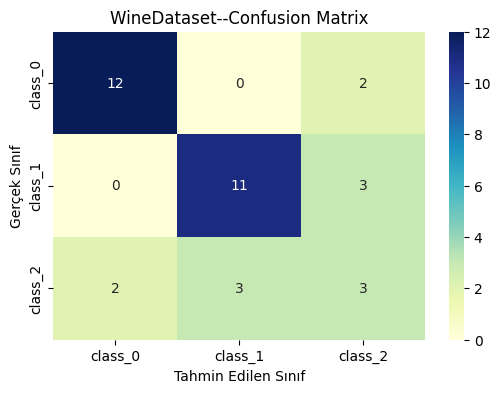

In [ ]:
#Consudion Matrix Görselleştirme

plt.figure(figsize=(6,4))#Grafik parametreleri

sns.heatmap( cm,annot=True,cmap="YlGnBu",fmt='d',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names
            )

plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("WineDataset--Confusion Matrix")
plt.show()

In [ ]:
"""

Satırlar: Gerçek sınıf
Sütunlar: Tahmin edilen sınıf
Sınıf isimleri:

class_0, class_1, class_2 → farklı şarap türleri

 1. Gerçek class_0 için tahminler:
 12 tanesi doğru tahmin edilmiş (class_0 → class_0)

 2 tanesi yanlış tahmin edilmiş (class_0 → class_2)

Yorum: class_0 çoğunlukla doğru tahmin edilmiş ama 2 örnek class_2 ile karışmış.
 Bu iki sınıfın özellikleri benziyor olabilir.

 2. Gerçek class_1 için tahminler:
 11 tanesi doğru tahmin edilmiş (class_1 → class_1)

 3 tanesi yanlış tahmin edilmiş (class_1 → class_2)

Yorum: class_1 örneklerinin bir kısmı class_2 ile karıştırılmış.
Bu durum modelin class_1 ile class_2 arasındaki ayrımı tam yapamadığını gösterir.

 3. Gerçek class_2 için tahminler:
 3 tanesi doğru tahmin edilmiş (class_2 → class_2)

2 tanesi class_0, 3 tanesi class_1 olarak tahmin edilmiş

Yorum: class_2 en çok hata yapılan sınıf. Toplam 8 örneğin sadece 3’ü doğru,
5’i yanlış tahmin edilmiş. Bu sınıf diğerlerinden daha zor ayrılıyor olabilir.




"""